In [ ]:
# Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [2]:
# Import data

dftrain = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds1_train.csv")
dfvalid = pd.read_csv("P:\Work in Progress\Mike Taylor\python\cs229\problem-sets\PS1\data\ds1_valid.csv")

In [3]:
dftrain[dftrain.y==0].head(5)

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0


In [4]:
dftrain[dftrain.y==1].head(5)

,x_1,x_2,y
400,3.723523,10.587718,1.0
401,2.205164,7.190778,1.0
402,4.244613,33.274952,1.0
403,5.395384,83.759385,1.0
404,5.032398,35.740489,1.0


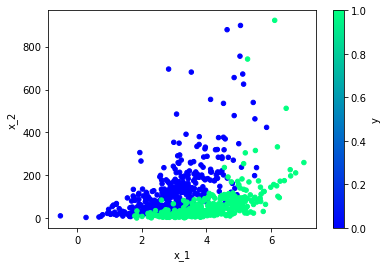

In [5]:
fig, ax = plt.subplots()
sc = dftrain.plot.scatter(x='x_1', y='x_2', c='y', colormap='winter', ax=ax)

In [6]:
y_train = dftrain["y"]
X_train = dftrain[["x_1","x_2"]]

y_test = dfvalid["y"]
X_test = dfvalid[["x_1","x_2"]]

y = pd.concat([y_train,y_test])
X = pd.concat([X_train,X_test])

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression(random_state=42)
lda_clf = LinearDiscriminantAnalysis()

for clf in (log_clf, lda_clf): # , rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))


LogisticRegression 0.9
LinearDiscriminantAnalysis 0.83


In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 8, 0, 1000], alpha=0.5, contour=True): # axes=[0, 8, 0, 8]
    X = X.to_numpy() # as_matrix() # added code to convert dataframe X to array X
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

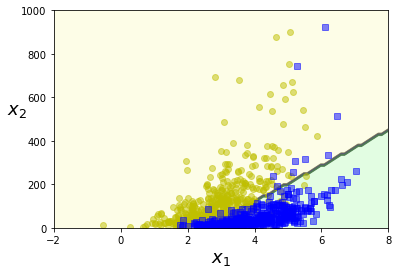

In [12]:
plot_decision_boundary(log_clf, X, y)

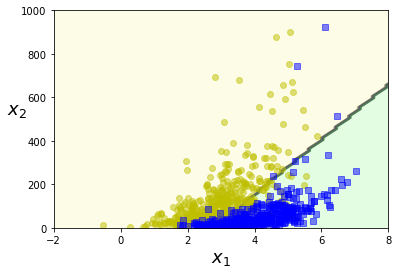

In [13]:
plot_decision_boundary(lda_clf, X, y)